In [1]:
import os
import pandas as pd
from math import floor
import matplotlib
from matplotlib import pyplot
pyplot.style.use("ggplot")

## Quick summary of all FDR estimate information

In [3]:
# This dict will map decoy context name to a DataFrame indicating the FDR estimates for this context
ctx2fdr = {}

output_dir = "/Poppy/mfedarko/chicken-gut-meta/sf/fdr-estimate-dmac100x/"

numpermbs = pd.read_csv(os.path.join(output_dir, "num-mutations-per-mb.tsv"), sep="\t", index_col=0)

for tsv_fp in os.listdir(output_dir):
    if tsv_fp.startswith("fdr-"):
        # remove the starting "fdr-" and ending ".tsv"
        ctx = tsv_fp[4:-4]
        ctx2fdr[ctx] = pd.read_csv(os.path.join(output_dir, tsv_fp), sep="\t", index_col=0)
    
print("All decoy contexts we found:\n -", "\n - ".join(ctx2fdr.keys()))
ctx2fdr["CP2"].head()

All decoy contexts we found:
 - CP2
 - CP2Nonsense
 - CP2Nonsyn
 - CP2Tv
 - CP2TvNonsense
 - Full
 - Nonsense
 - Nonsyn
 - Tv
 - TvNonsense
 - TvNonsyn


,r3,r4,r5,r6,r7,r8,r9,r10,r11,r12,...,r90,r91,r92,r93,r94,r95,r96,r97,r98,r99
Contig,,,,,,,,,,,,,,,,,,,,,
s0.ctg000001l,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1.ctg000002c,14.015042,4.802684,2.854462,1.680074,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s10.ctg000011c,29532.378311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s100.ctg000114l,5.727921,6.137058,635.799225,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
s1000.ctg001185l,31.226306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Select some high-diversity-index contigs

In [34]:
di = pd.read_csv("/Poppy/mfedarko/chicken-gut-meta/sf/call-r-minr3/diversity-indices.tsv", sep="\t", index_col=0)
long_di = di[di["Length"] >= 1000000]
long_di_sorted = long_di.sort_values(["DivIdx(r=10,minSuffCov=20.0)"], ascending=False)
long_di_sorted.head(16)

,AverageCoverage,Length,"DivIdx(r=2,minSuffCov=4.0)","DivIdx(r=3,minSuffCov=6.0)","DivIdx(r=4,minSuffCov=8.0)","DivIdx(r=5,minSuffCov=10.0)","DivIdx(r=10,minSuffCov=20.0)","DivIdx(r=20,minSuffCov=40.0)","DivIdx(r=50,minSuffCov=100.0)","DivIdx(r=100,minSuffCov=200.0)"
Contig,,,,,,,,,,
s16.ctg000156l,20.510740,3142968,0.003497,0.002560,0.001959,0.001470,0.000484,NaN,NaN,NaN
s89.ctg000101c,54.002073,3839122,0.001927,0.000997,0.000736,0.000657,0.000377,0.000018,NaN,NaN
s212.ctg000251c,38.605434,2457483,0.002775,0.001538,0.001004,0.000774,0.000269,NaN,NaN,NaN
s136.ctg000161c,116.258861,1804877,0.000713,0.000300,0.000276,0.000273,0.000252,0.000231,0.000204,NaN
s40.ctg000044c,59.458924,2570133,0.003097,0.001238,0.000523,0.000287,0.000185,0.000140,NaN,NaN
s29.ctg000031c,67.553755,3767362,0.003729,0.001981,0.001367,0.001002,0.000172,0.000053,NaN,NaN
s1.ctg000002c,304.735459,3005398,0.003192,0.000775,0.000485,0.000381,0.000095,0.000026,0.000022,0.000000
s260.ctg000309c,45.906309,3205809,0.001567,0.000214,0.000104,0.000078,0.000079,0.000000,NaN,NaN
s76.ctg000084c,26.065798,3467010,0.005150,0.002410,0.001337,0.000931,0.000067,NaN,NaN,NaN


## Plot FDR curves

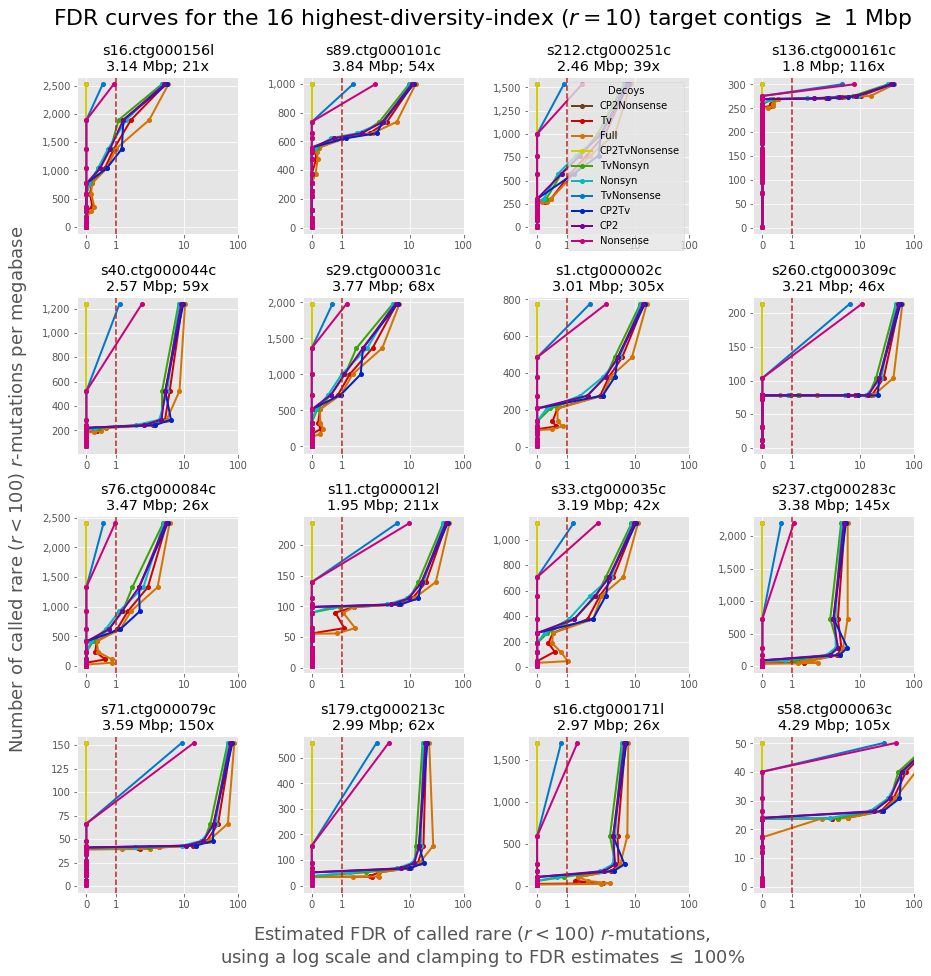

In [35]:
# TODO:
# - better colorscheme
# - abstract grid notebook code to somewhere else?
rainbow = [
    "#713F16", "#D40000", "#D47400", "#D4CE00", "#35A700",
    "#00BBC3", "#0079CC", "#0022CC", "#790096", "#CC007C"
]

fig, axes = pyplot.subplots(4, 4, gridspec_kw={"hspace": 0.4, "wspace": 0.4})

contigs_to_plot = list(long_di_sorted.index[:16])

contexts_to_plot = set(ctx2fdr) - {"CP2Nonsyn"}

for ci, contig in enumerate(contigs_to_plot):
    # We'll organize the grid of plots starting from the top-left and moving right:
    # 0 1 2 3
    # 4 5 6 7
    # 8 9 A B
    # C D E F
    col = ci % 4
    row = floor(ci / 4)
    
    assert contig != "s171.ctg000204l"
    
    length_info = f"{round(long_di_sorted['Length'][contig] / 1e6, 2):,} Mbp"
    cov_info = f"{round(long_di_sorted['AverageCoverage'][contig]):,}x"
    title = f"{contig}\n{length_info}; {cov_info}"
    axes[row, col].set_title(title)
    for ctx_i, ctx in enumerate(contexts_to_plot):
        x = []
        y = []
        xvals = ctx2fdr[ctx].loc[contig]
        yvals = numpermbs.loc[contig]
        for f, n in zip(xvals, yvals):
            if not pd.isna(f):
                x.append(f)
                y.append(n)

        # only add labels for one of the plots, since otherwise matplotlib will populate the legend
        # with (# decoy contexts) * (# plots) labels.
        if ci == 2:
            label = ctx
        else:
            label = None
        axes[row, col].plot(x, y, marker="o", lw=2, color=rainbow[ctx_i], label=label, markersize=4)
        
    axes[row, col].axvline(x=1, linestyle="--", color="#b22")
    axes[row, col].set_xscale("symlog")
    axes[row, col].xaxis.set_major_formatter("{x:,.0f}")
    axes[row, col].yaxis.set_major_formatter("{x:,.0f}")
    axes[row, col].set_xlim(-0.3, 100)

axes[0, 2].legend(title="Decoys")
fig.text(
    0.06, 0.26, "Number of called rare ($r < 100$) $r$-mutations per megabase",
    fontsize=18, rotation="vertical", color="#555"
)
fig.text(
    0.5, 0.06,
    "Estimated FDR of called rare ($r < 100$) $r$-mutations,\nusing a log scale and clamping to FDR estimates $\leq$ 100%",
    fontsize=18, color="#555", ha="center"
)
fig.suptitle(
    f"FDR curves for the {num_plots} highest-diversity-index ($r = 10$) target contigs $\geq$ 1 Mbp",
    fontsize=22,
    y=0.945
)
fig.set_size_inches(15, 15)